In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from parameters import parameters_array

In [8]:
def plot(episode_number_max):

    plt.figure(
        figsize=(16, 8)
    )

    for parameters_index, parameters in enumerate(parameters_array):
        if parameters['episode number max'] == episode_number_max:

            file_name = f'df_{parameters_index}.csv'
            runs = pd.read_csv(file_name, index_col=0)

            _, runs_amount = runs.shape

            label = ''

            # gamma
            label += r'$\gamma = ' + str(parameters["gamma"]) + '$'

            # feature info
            label += ', ' + 'feature mode: ' + parameters['feature info']['mode']
            label += ', ' + 'degree: ' + str(parameters['feature info']['degree'])

            # learning method
            label += ', ' + 'learning method: ' + parameters['learning method']

            if parameters['learning method'] == 'REINFORCE':
                label += ', ' + r'$\alpha = ' + str(parameters["alpha"]) + '$'

            elif parameters['learning method'] in ['REINFORCE with Baseline', 'One-step Actor-Critic']:

                label += ', ' + r'$\alpha_\theta = ' + str(parameters["alpha_theta"]) + '$'
                label += ', ' + r'$\alpha_w = ' + str(parameters["alpha_w"]) + '$'

            else:
                raise NotImplementedError(parameters['learning method'])

            label += ', ' + f'averaged over {runs_amount} runs'

            runs.mean(axis=1).plot(label=label)

    plt.suptitle('CartPole-v0')
    plt.xlabel('Episode')
    plt.ylabel(f'$G_0$, Total reward on episode')

    plt.legend()
    plt.show()

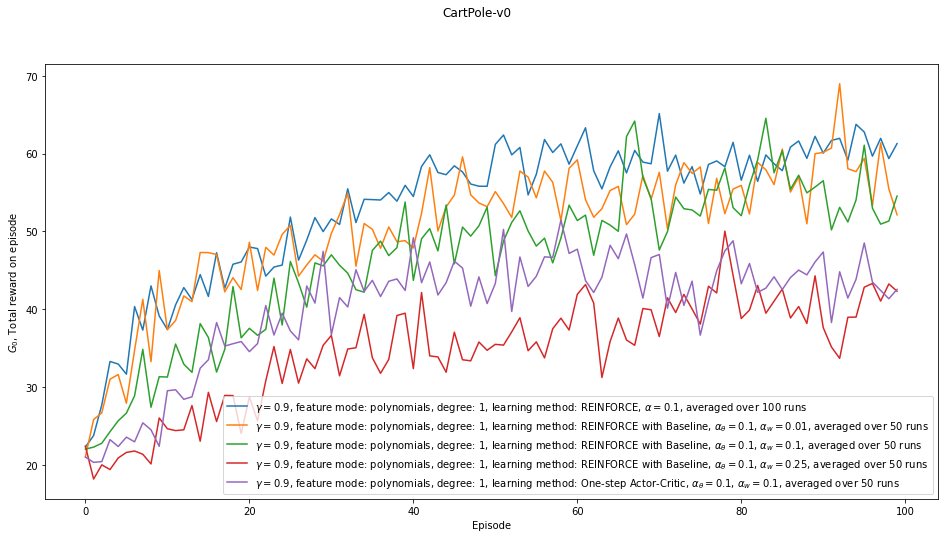

In [14]:
plot(100)